<a href="https://colab.research.google.com/github/Starleen1996/TelecomX_Parte2_Latam_Predicci-n_Modelos/blob/main/TelecomX_LATAM_Parte2_Predicci%C3%B3n_Modelos_Actualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

In [47]:
import requests
import json
import pandas as pd
import sklearn
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import yellowbrick


#### Extracción del Archivo Tratado - Predicción de Cancelación (Churn)

In [48]:
url = 'https://raw.githubusercontent.com/Starleen1996/TelecomX_Parte2_Latam_Predicci-n_Modelos/refs/heads/main/df_clientes_LATAM.csv'

# Posteriormente vamos a leer la url con los datos
datos = pd.read_csv(url)
datos.head()

,ID_cliente,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0002-orfbo,0,Female,0,1,1,9,1,0,Dsl,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,19.776667
1,0003-mknfe,0,Male,0,0,0,9,1,1,Dsl,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,18.080000
2,0004-tlhlj,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,9.361667
3,0011-igkff,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,41.261667
4,0013-exchz,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,8.913333


In [49]:
#Verificamos la información de la base de datos para observar el tipo de variables, total de columnas,total de filas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_cliente                   7043 non-null   object 
 1   cliente_vigente              7043 non-null   int64  
 2   genero                       7043 non-null   object 
 3   cliente>=65_anos             7043 non-null   int64  
 4   matrimonio                   7043 non-null   int64  
 5   tiene_dependientes           7043 non-null   int64  
 6   #_meses_contrato             7043 non-null   int64  
 7   servicio_telefonico          7043 non-null   int64  
 8   suscripcion>1_linea          7043 non-null   int64  
 9   internet_internetservice     7043 non-null   object 
 10  suscripcion_seguridad_linea  7043 non-null   object 
 11  suscripcion_de_respaldo      7043 non-null   object 
 12  suscripcion_proteccion       7043 non-null   object 
 13  suscripcion_soport

In [50]:
datos.shape

(7043, 22)

In [51]:
datos.describe()

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,2283.300441,76.110015
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,2266.771362,75.559045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,401.450000,13.381667
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,46.582500
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,126.491250
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,289.493333


In [52]:
datos.describe(include='O') # Podemos ver la estadistica descriptiva de las variables categoricas

,ID_cliente,genero,internet_internetservice,suscripcion_seguridad_linea,suscripcion_de_respaldo,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,forma_pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,4
top,9995-hotoh,Male,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,3096,3498,3088,3095,3473,2810,2785,3875,2365


#### Eliminación de columnas irrelevantes
Vamos a realizar la eliminación de la columna ID_Cliente ya que no aporta valor al análisis o al modelo predictivo

In [53]:
# Con este código eliminamos la columna ID_clientes de nuentra Dataframe
datos = datos.drop('ID_cliente', axis=1)


In [54]:
datos.info()
datos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cliente_vigente              7043 non-null   int64  
 1   genero                       7043 non-null   object 
 2   cliente>=65_anos             7043 non-null   int64  
 3   matrimonio                   7043 non-null   int64  
 4   tiene_dependientes           7043 non-null   int64  
 5   #_meses_contrato             7043 non-null   int64  
 6   servicio_telefonico          7043 non-null   int64  
 7   suscripcion>1_linea          7043 non-null   int64  
 8   internet_internetservice     7043 non-null   object 
 9   suscripcion_seguridad_linea  7043 non-null   object 
 10  suscripcion_de_respaldo      7043 non-null   object 
 11  suscripcion_proteccion       7043 non-null   object 
 12  suscripcion_soporte          7043 non-null   object 
 13  suscripcion_tv_cab

(7043, 21)

In [55]:
datos.columns

Index(['cliente_vigente', 'genero', 'cliente>=65_anos', 'matrimonio',
       'tiene_dependientes', '#_meses_contrato', 'servicio_telefonico',
       'suscripcion>1_linea', 'internet_internetservice',
       'suscripcion_seguridad_linea', 'suscripcion_de_respaldo',
       'suscripcion_proteccion', 'suscripcion_soporte', 'suscripcion_tv_cable',
       'suscripcion_peliculas', 'tipo_contrato', 'factura_electronica',
       'forma_pago', 'total_servicios_mes', 'total_pagado_cliente',
       'Cuentas_Diarias'],
      dtype='object')

In [56]:
## Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='suscripcion>1_linea', color='cliente_vigente', text_auto=True,barmode='group')
# Podemos identificar que los clientes con mas de 1 servicio (diagrama de la derecha), muestra un retiro de 2121 personas y siguen en la compañia 850.
# Podemos identificar que los clientes que tienen  1 servicio (diagrama de la izquierda), triplican (3053 personas) sobre los que aún siguen afiliados a la compañia (1019).

In [57]:
# Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='genero', color='cliente_vigente', text_auto=True,barmode='group')
#

In [58]:
# Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='cliente>=65_anos', color='cliente_vigente', text_auto=True,barmode='group')
#

In [59]:
px.box(datos, x='#_meses_contrato', color='cliente_vigente')

In [60]:
px.box(datos, x='total_servicios_mes', color='cliente_vigente')

#ENCODING
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [61]:
from sklearn.compose import make_column_transformer  # Este modulo ayuda a realizar una transformación de columnas
from sklearn.preprocessing import OneHotEncoder # Ayuda a realizar transformación de 1 y 0

In [62]:
#Definir variables explicativas (X) y de respuesta (y)

X = datos.drop('cliente_vigente', axis=1)
y= datos['cliente_vigente']


In [63]:
columnas = X.columns # Creamos una variable llamada columnas
columnas

Index(['genero', 'cliente>=65_anos', 'matrimonio', 'tiene_dependientes',
       '#_meses_contrato', 'servicio_telefonico', 'suscripcion>1_linea',
       'internet_internetservice', 'suscripcion_seguridad_linea',
       'suscripcion_de_respaldo', 'suscripcion_proteccion',
       'suscripcion_soporte', 'suscripcion_tv_cable', 'suscripcion_peliculas',
       'tipo_contrato', 'factura_electronica', 'forma_pago',
       'total_servicios_mes', 'total_pagado_cliente', 'Cuentas_Diarias'],
      dtype='object')

In [64]:
datos

,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,suscripcion_seguridad_linea,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,19.776667
1,0,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,18.080000
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,9.361667
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,41.261667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,0,Dsl,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,24.763333
7039,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,62.456667
7040,0,Male,0,0,0,2,1,0,Dsl,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,3.091667
7041,0,Male,0,1,1,67,1,0,Dsl,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,154.255000


In [67]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['genero','internet_internetservice','tipo_contrato','forma_pago']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [68]:
X = one_hot.fit_transform(X)
 # one_hot.fit(X) y one_hot.transform(X) (o fit_transform)normalmente devuelven un ndarray (denso) o scipy.sparse según la configuración (sparse_threshold, OneHotEncoder.sparse_output, etc.). En tu caso sparse_threshold=0 forzará un ndarray denso.

In [69]:
one_hot.get_feature_names_out(columnas)
#sirve para obtener los nombres de las columnas que genera tu transformador (one_hot) después de aplicarlo a las columnas originales que pasaste (en este caso, columnas).

array(['onehotencoder__genero_Male',
       'onehotencoder__internet_internetservice_0',
       'onehotencoder__internet_internetservice_Dsl',
       'onehotencoder__internet_internetservice_Fiber optic',
       'onehotencoder__tipo_contrato_Month-to-month',
       'onehotencoder__tipo_contrato_One year',
       'onehotencoder__tipo_contrato_Two year',
       'onehotencoder__forma_pago_Bank transfer (automatic)',
       'onehotencoder__forma_pago_Credit card (automatic)',
       'onehotencoder__forma_pago_Electronic check',
       'onehotencoder__forma_pago_Mailed check',
       'remainder__cliente>=65_anos', 'remainder__matrimonio',
       'remainder__tiene_dependientes', 'remainder__#_meses_contrato',
       'remainder__servicio_telefonico', 'remainder__suscripcion>1_linea',
       'remainder__suscripcion_seguridad_linea',
       'remainder__suscripcion_de_respaldo',
       'remainder__suscripcion_proteccion',
       'remainder__suscripcion_soporte',
       'remainder__suscripcion_tv

In [70]:
X

array([[0.0, 0.0, 1.0, ..., 65.6, 593.3, 19.776666666666664],
       [1.0, 0.0, 1.0, ..., 59.9, 542.4, 18.08],
       [1.0, 0.0, 0.0, ..., 73.9, 280.85, 9.361666666666668],
       ...,
       [1.0, 0.0, 1.0, ..., 50.3, 92.75, 3.091666666666667],
       [1.0, 0.0, 1.0, ..., 67.85, 4627.65, 154.255],
       [1.0, 0.0, 1.0, ..., 59.0, 3707.6, 123.58666666666666]],
      dtype=object)

In [71]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__genero_Male,onehotencoder__internet_internetservice_0,onehotencoder__internet_internetservice_Dsl,onehotencoder__internet_internetservice_Fiber optic,onehotencoder__tipo_contrato_Month-to-month,onehotencoder__tipo_contrato_One year,onehotencoder__tipo_contrato_Two year,onehotencoder__forma_pago_Bank transfer (automatic),onehotencoder__forma_pago_Credit card (automatic),onehotencoder__forma_pago_Electronic check,...,remainder__suscripcion_seguridad_linea,remainder__suscripcion_de_respaldo,remainder__suscripcion_proteccion,remainder__suscripcion_soporte,remainder__suscripcion_tv_cable,remainder__suscripcion_peliculas,remainder__factura_electronica,remainder__total_servicios_mes,remainder__total_pagado_cliente,remainder__Cuentas_Diarias
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,1,65.6,593.3,19.776667
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,59.9,542.4,18.08
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,73.9,280.85,9.361667
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,0,1,1,1,98.0,1237.85,41.261667
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,83.9,267.4,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,55.15,742.9,24.763333
7039,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,85.1,1873.7,62.456667
7040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,50.3,92.75,3.091667
7041,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,0,1,0,67.85,4627.65,154.255


#### Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [73]:
datos.value_counts('cliente_vigente')
# Verificando la proporción de cancelación vemos un desbalance en la variable (clientes vigentes).
# 0 = Clientes que siguen en la compañia
# 1 = Clientes que se han retirado en la compañia

# Con el fin de que ambas clases  queden con igual proporción de los datos vamos a realizar una estratificación en nuestra variable objetivo o de respuesta.

,count
cliente_vigente,
0,5174
1,1869


In [74]:
datos['cliente_vigente'].value_counts(normalize=True)


,proportion
cliente_vigente,
0,0.73463
1,0.26537


In [75]:
from sklearn.model_selection import StratifiedKFold # Aseguramos que la proporción de cada clase se mantenga

#Correlación
¿Cuáles factores están relacionados con el Churn? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* -1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.

* 0: no hay relación lineal entre las variables.

* 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

In [84]:
datos

,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,suscripcion_seguridad_linea,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,19.776667
1,0,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,18.080000
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,9.361667
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,41.261667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,0,Dsl,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,24.763333
7039,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,62.456667
7040,0,Male,0,0,0,2,1,0,Dsl,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,3.091667
7041,0,Male,0,1,1,67,1,0,Dsl,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,154.255000


In [ ]:
# Filtrar solo variables numéricas para ver la correlación entre las variables
df_numericas = datos.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_numericas

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,0,1,1,9,1,0,1,65.60,593.30,19.776667
1,0,0,0,0,9,1,1,0,59.90,542.40,18.080000
2,1,0,0,0,4,1,0,1,73.90,280.85,9.361667
3,1,1,1,0,13,1,0,1,98.00,1237.85,41.261667
4,1,1,1,0,3,1,0,1,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,0,55.15,742.90,24.763333
7039,1,0,1,0,22,1,1,1,85.10,1873.70,62.456667
7040,0,0,0,0,2,1,0,1,50.30,92.75,3.091667
7041,0,0,1,1,67,1,0,0,67.85,4627.65,154.255000


In [ ]:
# Calcular correlación
corr = df_numericas.corr()
corr

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
cliente_vigente,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,-0.199484,-0.199484
cliente>=65_anos,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.156530,0.220173,0.102411,0.102411
matrimonio,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.014877,0.096848,0.319072,0.319072
tiene_dependientes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.111377,-0.113890,0.064653,0.064653
#_meses_contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.006152,0.247900,0.825880,0.825880
servicio_telefonico,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.016505,0.247398,0.113008,0.113008
suscripcion>1_linea,0.040102,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.163530,0.490434,0.469042,0.469042
factura_electronica,0.191825,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.163530,1.000000,0.352150,0.157830,0.157830
total_servicios_mes,0.193356,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490434,0.352150,1.000000,0.651065,0.651065
total_pagado_cliente,-0.199484,0.102411,0.319072,0.064653,0.825880,0.113008,0.469042,0.157830,0.651065,1.000000,1.000000


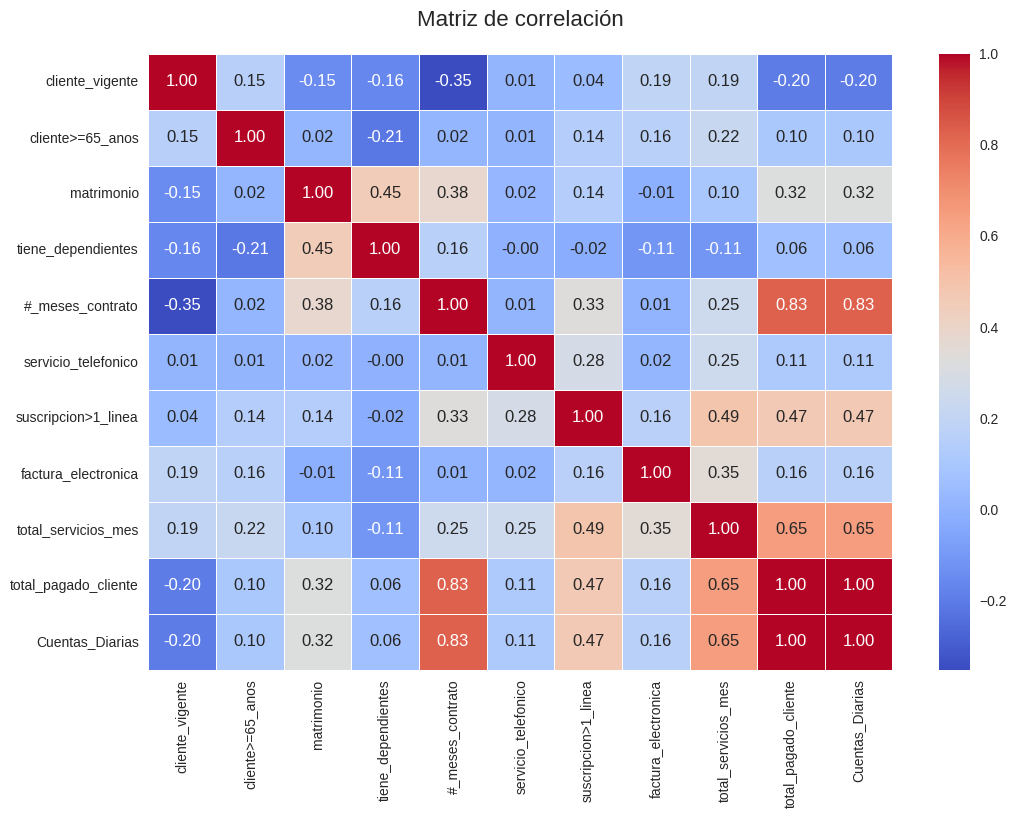

In [ ]:
# Generamos un grafico para visualizar la correlación entre las variables cuantitativas o númericas.
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación", fontsize=16, pad=20)
plt.show()

#### Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [77]:
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)